In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sys import path
path.append('./../spineSimulator/')
import plot
from simulation_parameters import simulation_parameters

from importlib import reload
reload(plot)

<module 'plot' from '/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py'>

In [2]:
# text rendering with LaTex
plt.rc('text', usetex=True)
plt.rc('font', family='sans')

# Simlution grid (x,t) and size parameters

In [3]:
t_sim,x_sim,a_sim = simulation_parameters['standard']

/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:371: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(xi,1)) for xi in ax.get_xticks() * 1.e9])


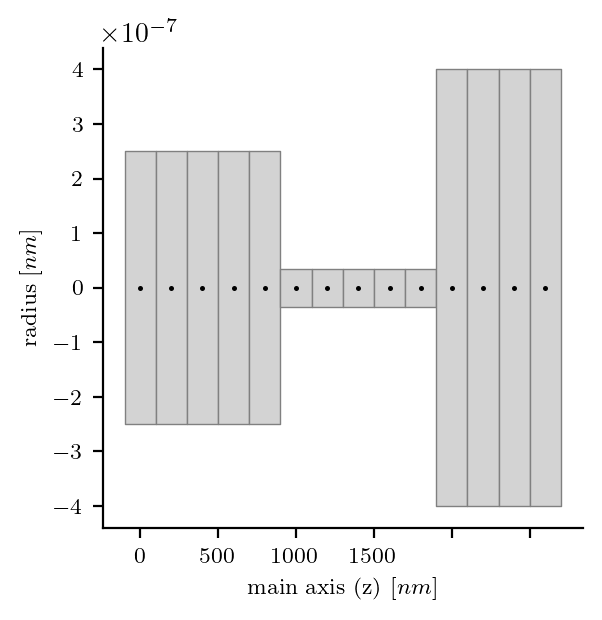

In [4]:
reload(plot)
fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.x_grid_on_spine(fig, pos, x_sim,a_sim)

(-0.4, 0.4)

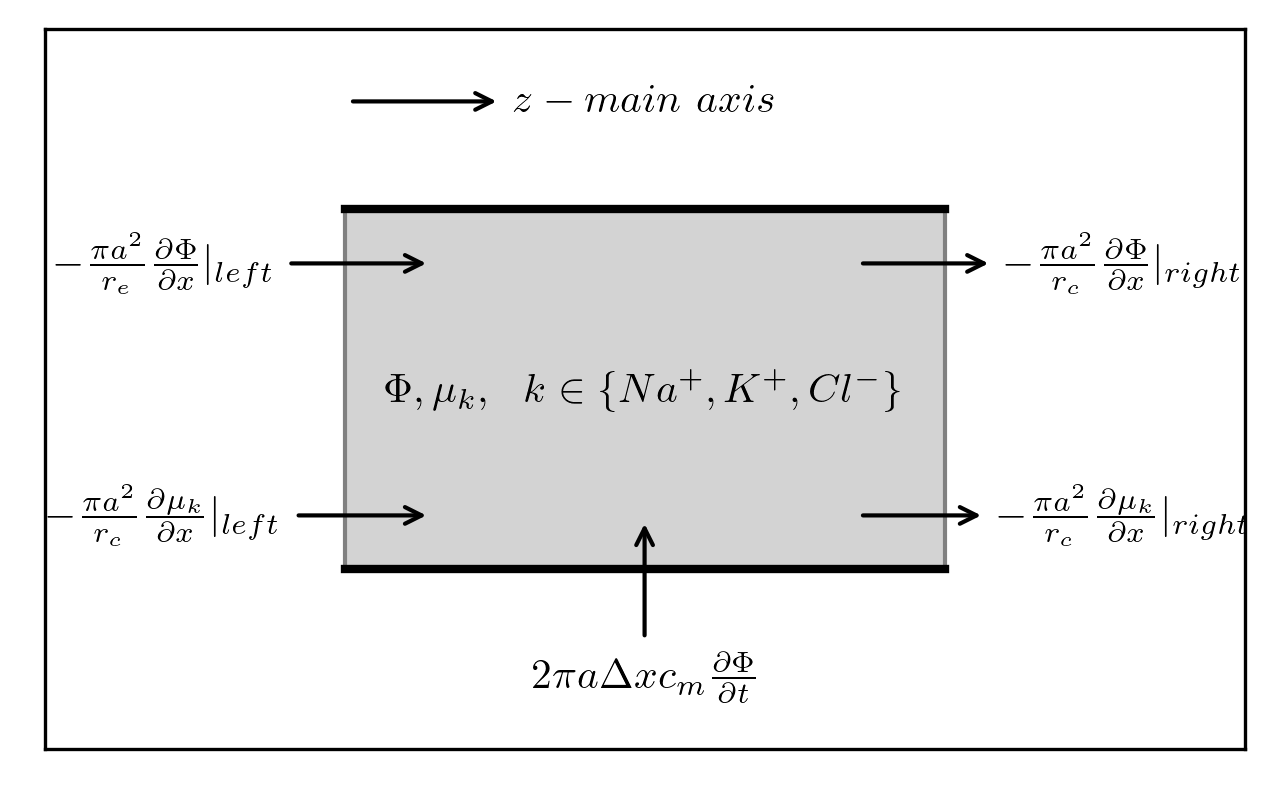

In [5]:




fig = plt.figure(facecolor='white', dpi=300, figsize=(5,3))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.set_xticks([])
ax.set_yticks([])


l = 0.6
h = 0.4

ax.fill_between([-l/2., l/2.],[-h/2.,-h/2.], [h/2., h/2.], facecolor='lightgrey', edgecolor='gray')
ax.plot([-l/2., l/2.],[-h/2.,-h/2.], 'k-', lw=2.)
ax.plot([-l/2., l/2.],[h/2.,h/2.], 'k-', lw=2.)


ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \mu_k}{\partial x }|_{left}$", 
            xy=(-l/2*0.7, -h/2*0.7), xytext=(-l*0.8, -h/2.*0.7), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_e}\frac{\partial \Phi}{\partial x }|_{left}$", 
            xy=(-l/2*0.7, h/2*0.7), xytext=(-l*0.8, h/2.*0.7), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \Phi}{\partial x }|_{right}$", 
            xy=(l/2*0.7, h/2*0.7), xytext=(l*0.8, h/2.*0.7), arrowprops=dict(arrowstyle="<-"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \mu_k}{\partial x }|_{right}$", 
            xy=(l/2*0.7, -h/2*0.7), xytext=(l*0.8, -h/2.*0.7), arrowprops=dict(arrowstyle="<-"), ha='center', va='center')

ax.annotate(r"$2 \pi a \Delta x c_m \frac{\partial \Phi}{\partial t }$", 
            xy=(0., -h/2.*0.7), xytext=(0., -0.8*h), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

#ax.annotate(r"$2 \pi a \Delta x ~ i_{AMPA}$",
#            xy=(0., h/2.*0.7), xytext=(0., 0.8*h), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$z - main~axis$",
            xy=(-0.3, 0.8*h), xytext=(0., 0.8*h), arrowprops=dict(arrowstyle="<-"), ha='center', va='center')

ax.text(0., 0., '$\Phi, \mu_k, ~~k \in \{{Na^+},{K^+},{Cl^{-}}\}$', va='center', ha='center')

ax.set_xlim([-l,l])
ax.set_ylim([-h,h])


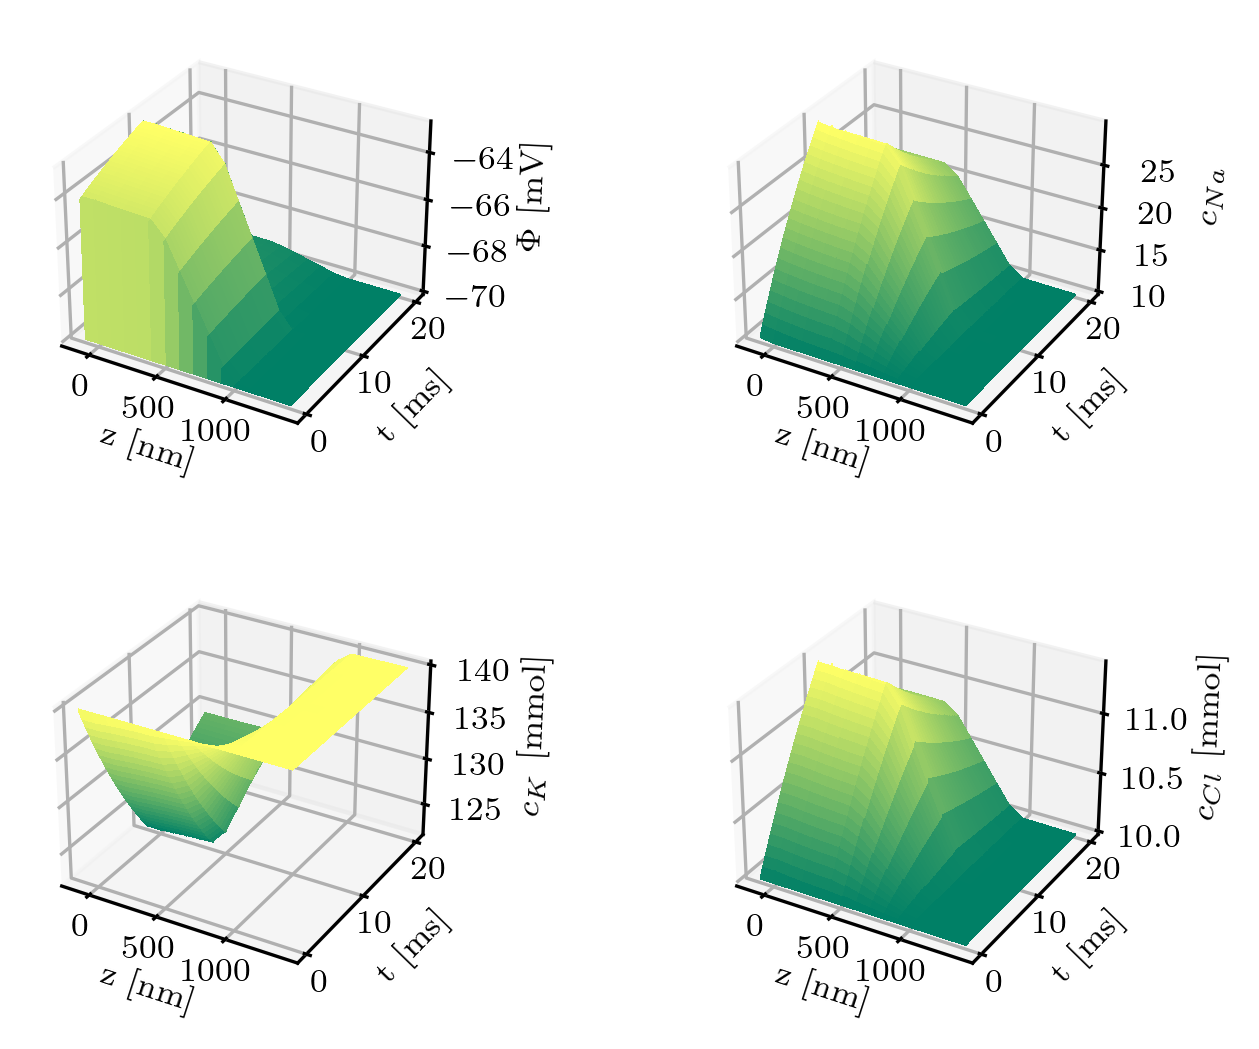

In [6]:
reload(plot)
file_id = 'experiment_1'
plot.figure_space_time_summary(file_id)
#plt.title(file_id)
plt.show()

# Figure 01

In [7]:
(
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary('experiment_1')

np.shape(t), np.shape(x)

((401,), (16,))

/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py:371: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(round(xi,1)) for xi in ax.get_xticks() * 1.e9])


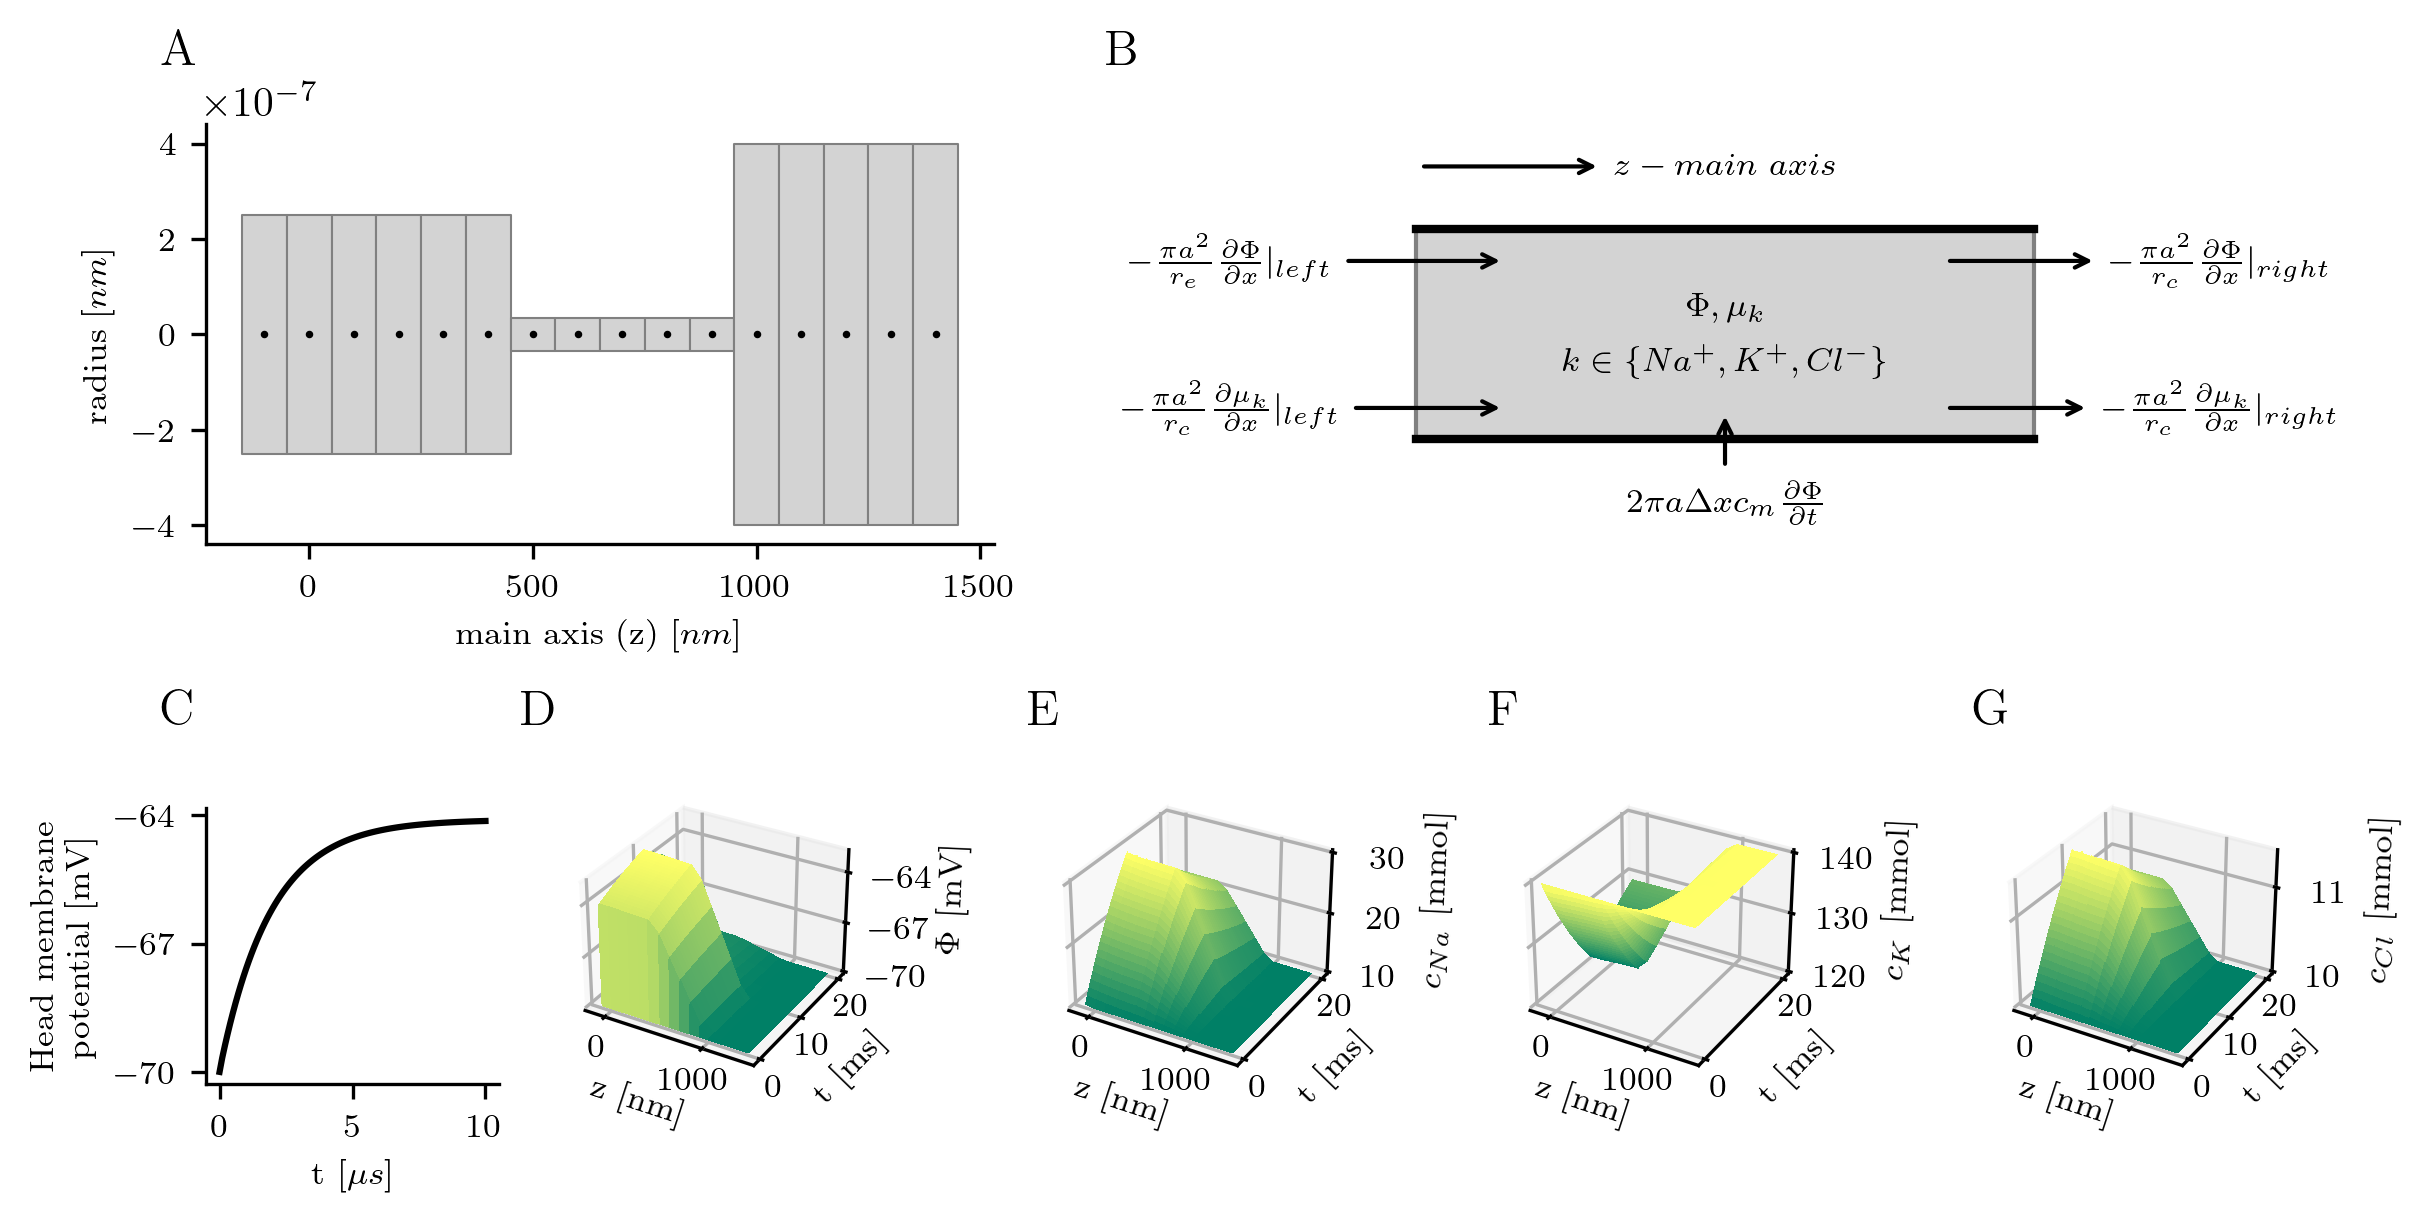

In [8]:
reload(plot)


# Finite Difference Domain
pos1 = [0.05,0.55,0.35,0.35]


# Extended Cable Equations
pos2 = [0.45, 0.55, 0.55,0.35]



  
wx, wy = 0.15, 0.25
pos3 = [0.05, 0.1, wx-0.02, wy-0.02]
pos4 = [0.20, 0.1, wx, wy]
pos5 = [0.415, 0.1, wx, wy]
pos6 = [0.62, 0.1, wx, wy]
pos7 = [0.835, 0.1, wx, wy]

fig = plt.figure(dpi=300, figsize=(7.5,4))

(
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary('experiment_1')

def ax_cap_charge_head(fig, pos, file_id):
    (
    x,
    a,
    t,
    phi,
    c_Na,
    c_K,
    c_Cl,
    param_set,
    params,
    dx,
    dt,
    r_Na,
    R_Na,
    g_Na_ij,
    r_K,
    R_K,
    g_K_ij,
    r_Cl,
    R_Cl,
    g_Cl_ij,
    r_e,
    R_e,
    g_ij,
    i_c_Na,
    i_c_K,
    i_c_Cl,
    i_e_Na,
    i_e_K,
    i_e_Cl,
    i_e,
    i_c,
    i_total,
    ) = plot.get_results_summary(file_id)
    ax = fig.add_axes(pos)
    ax.plot(t*1.e6, phi[:,1]*1.e3, 'k-')
    ax.set_ylabel('Head membrane \npotential [mV]', fontsize=8)
    ax.set_yticks([-70,-67,-64])
    ax.set_xticks([0,5,10])
    ax.set_xlabel('t [$\mu s]$', fontsize=8)
    ax.tick_params(labelsize=8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    

# Simulation Results
xx, tt = np.meshgrid(x,t)

plot.x_grid_on_spine(fig, pos1, x,a)
plot.ax_extended_cable(fig, pos2)
ax_cap_charge_head(fig, pos3, 'experiment_10')
plot.ax_surface(fig, pos4, xx, tt, phi, z_label=r'$\Phi$ [mV]', layout='Phi', z_ticks=(-70,-67,-64))
plot.ax_surface(fig, pos5, xx, tt, c_Na, z_label=r'$c_{Na}$ [mmol]', z_ticks=(10,20,30))
plot.ax_surface(fig, pos6, xx, tt, c_K, z_label=r'$c_K$ [mmol]', z_ticks=(120,130,140))
plot.ax_surface(fig, pos7, xx, tt, c_Cl, z_label=r'$c_{Cl}$ [mmol]', z_ticks=(10,11))

fig.text(0.03, 0.95,'A',  fontsize=12)
fig.text(0.45, 0.95,'B',  fontsize=12)
fig.text(0.03, 0.4,'C',  fontsize=12)
fig.text(0.19, 0.4,'D',  fontsize=12)
fig.text(0.415, 0.4,'E',  fontsize=12)
fig.text(0.62, 0.4,'F',  fontsize=12)
fig.text(0.835, 0.4,'G',  fontsize=12)

plt.show()

# FIgure 1
    A) Spine model with parameters found in Cornejo et al. 2022
    B) Extended cable model distinguishes between different ion-species and diffusive and electric currents.
    C) Membrane potential 10 \mu s shows charging of membrane capacitor.  TODO
    D-G) 25 pA input current of sodium ions for 10 ms.
 

In [9]:
import matplotlib.pyplot as plt
help(plt.annotate)

Help on function annotate in module matplotlib.pyplot:

annotate(text, xy, *args, **kwargs)
    Annotate the point *xy* with text *text*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    text : str
        The text of the annotation.
    
    xy : (float, float)
        The point *(x, y)* to annotate. The coordinate system is determined
        by *xycoords*.
    
    xytext : (float, float), default: *xy*
        The position *(x, y)* to place the text at. The coordinate system
        is determined by *textcoords*.
    
    xycoords : str or `.Artist` or `.Transform` or callable or (float, float), default: 'data'
    
        The coordinate system that *xy* is given in. The following types
        of values are supported:
    
        - One of the fo